***

Profesor: Gonzalo A. Ruz, PhD

Curso: Aprendizaje Automático

Curso basado en el libro Introduction to Machine Learning with Python by Andreas Mueller and Sarah Guido.

***

In [2]:
# Global imports and settings
%matplotlib inline


# Clase 1: Introducción a Machine Learning

![](https://drive.google.com/uc?id=1qNMIFbs7Mb3R2d0vUVuRKJk8FYAEp7A8)


## Inteligencia Artificial
1950s: Se puede hacer que un computador 'piense'?
- automatizar tareas que requieren un cierto nivel intelectual usalmente llevadas a cabo por humanos
- abarca aprendizaje, pero también muchas otras tareas(e.j. lógica, planificación,...)
- *IA simbólica*: reglas/algortimos programados para administrar el conocimiento
    - Muy bueno para problemas bien definidos: ajedrez, sistemas expertos,...
    - Usado hoy de manera generalizada (e.j. diseño de chips)
    - Difícil para problemas complejos y difusos (por ejemplo, imágenes, texto)

## IA simbólica

![](https://drive.google.com/uc?id=1dK7a9mnUqSLle8X4Pe93b5fKlLy6x89s)

## Sistema experto

![](https://drive.google.com/uc?id=1hECT-kjAAWiFDp_1GVKkQgnBpmqCEFPg)


## Difícil para un sistema experto
### Chihuahua o muffin?

![](https://drive.google.com/uc?id=1tOtHLNIcwMjajJcY6NcnoUJPRxe4zPEU)

## Machine Learning
¿Son las computadoras capaces de aprender y de ser originales?
- Aprender a realizar una tarea T dada la experiencia (ejemplos) E, siempre mejorando de acuerdo a alguna métrica M
- Nuevo paradigma de programación
    - El sistema se *entrena* en lugar de programado explícitamente
    - *Generaliza* a partir de ejemplos para encontrar reglas (modelos) para actuar/predecir
- A medida que se disponga de más datos, se podrán abordar problemas más ambiciosos

![](https://drive.google.com/uc?id=1-Dl76Ms4NjmPUH_nGzywzl_UxS9a9_en)

### Machine learning vs Estadística
* Ambos tienen como objetivo hacer predicciones de fenómenos naturales:
![](https://drive.google.com/uc?id=1WcPuIx9x-Gbm5rt4PPPOpa4q9PPzX94U)
* Estadística:
    - Ayuda a los humanos a entender el mundo
    - Paramétrico: asume que los datos se generan según un modelo paramétrico
![](https://drive.google.com/uc?id=1OLWwJ-gyp_Tl-eN8hwRu0NitJ975-QrQ)
* Machine learning:
    - Automatizar una tarea completamente (parcialmente *reemplazar* al humano)
    - Asume que el proceso de generación de datos es desconocido
    - Orientado a la ingeniería, menos (¿demasiado poco?) teoría matemática
![](https://drive.google.com/uc?id=1kaLBgb9uf0nhZl04w2G9kf6fthbRb8K9)

Revisar [Breiman (2001): Statistical modelling: The two cultures](http://www2.math.uu.se/~thulin/mm/breiman.pdf)

### Historias de éxito de Machine Learning
- Los motores de búsqueda (por ejemplo, Google)
- Sistemas de recomendación (por ejemplo, Netflix)
- Traducción automática (por ejemplo, Google Translate)
- Comprensión del habla (por ejemplo, Siri, Alexa)
- Juego (por ejemplo, AlphaGo)
- Automóviles autónomos
- Medicina personalizada
- Progreso en todas las ciencias: Genética, astronomía, química, neurología, física,..

# Tipos de machine learning
- __Aprendizaje Supervisado__: aprender un _modelo_ a partir de _datos de entrenamiento_ previamente etiquetados
    - Dada una nueva entrada _X_, predecir la salida correcta _y_
    - Dadas las imágenes de gatos y perros, predecir si una nueva imagen es un gato o un perro
- __Aprendizaje No Supervisado__: explorar la estructura de los datos para extraer información significativa
    - Dadas las entradas _X_, encontrar cuáles son especiales, similares, anómalas, ...
- __Aprendizaje Semi-Supervisado__: aprender un modelo de (pocos) ejemplos etiquetados y (muchos) sin etiquetar
    - Los ejemplos sin etiquetar agregan información sobre qué ejemplos nuevos son probable que ocurran
- __Aprendizaje Reforzado__: desarrollar un agente que mejore su rendimiento en función de las interacciones con el entorno.

Nota: Los sistemas ML prácticos pueden combinar muchos tipos en un solo sistema.

## Machine Learning Supervisado

- Aprender un modelo a partir de datos de entrenamiento etiquetados, luego, hacer predicciones
- Supervisado: sabemos el resultado correcto / deseado (etiqueta)
- Subtipos: _clasificación_ (predecir una clase) y _regresión_ (predecir un valor numérico)
- La mayoría de los algoritmos supervisados que veremos pueden hacer ambas cosas.

## Un ejemplo

![](https://drive.google.com/uc?id=1HQpISnXmfZP0hHwijZOxB3KCA0isgPSU)

![](https://drive.google.com/uc?id=1M3s-JLYL7j4dU3LqWovnd0sgVw39IF1S)

## Más formal

![](https://drive.google.com/uc?id=1-KyVuvIcVEXqr0RUpCvfvXyl__59k4Jy)

### Clasificación

- Predecir una _etiqueta de clase_ (categoría), discreta y desordenada
    - Puede ser _binario_ (por ejemplo, spam / no spam) o _multi-clase_ (por ejemplo, reconocimiento de letras)
    - Muchos clasificadores pueden devolver una _confianza_ por clase
- Las predicciones del modelo producen una frontera de decisión que separa las clases.

In [3]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install ipywidgets

In [5]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# create a synthetic dataset
X, y = make_blobs(centers=2, cluster_std=2.5, random_state=8)

# Train classifiers
lr = LogisticRegression().fit(X, y)
svm = SVC(kernel='rbf', probability=True).fit(X, y)
knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)

# Plotting
@interact
def plot_classifier(classifier=[lr,svm,knn]):
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))    
    mglearn.tools.plot_2d_separator(
        classifier, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(
        classifier, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
    for ax in axes:
        mglearn.discrete_scatter(X[:, 0], X[:, 1], y,
                                 markers='o', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    cbar.set_label('Predicted probability', rotation=270, labelpad=15)
    cbar.set_alpha(1)
    cbar.draw_all() 
    axes[0].legend(["Class 0", "Class 1"], ncol=4, loc=(.1, 1.1));

interactive(children=(Dropdown(description='classifier', options=(LogisticRegression(), SVC(probability=True),…

#### Ejemplo: clasificación de flores
Clasificar los tipos de flores de iris (setosa, versicolor o virginica)

![](https://drive.google.com/uc?id=1PyInAadLrF9BMd1ptvjZ_xiNhykB7vhN)


#### Representación: características (atributos, variables, *features*) de entrada y etiquetas
- El conjunto de datos puede tener cualquier cantidad de características de entrada (variables)
    - Cada ejemplo es un punto en un espacio (posiblemente de alta dimensión)
    
![](https://drive.google.com/uc?id=1gD_5dQlnD4rch1H59zuYzQ9uKUSX8_a7)
![](https://drive.google.com/uc?id=1oah3VCaWnslYQYUemsAvxqep6ws_V-OB)

### Regresión
- Predecir un valor continuo, ej. temperatura
    - La variable objetivo es numérica
    - Algunos algoritmos pueden devolver un _intervalo de confianza_
- Encuentre la relación entre los predictores y el objetivo.
    - Por ej. relación entre horas estudiadas y nota final

In [6]:
import numpy as np
from mglearn.datasets import make_wave
from mglearn.plot_helpers import cm2
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X, y = make_wave(n_samples=60)
x = np.atleast_2d(np.linspace(-3, 3, 100)).T
lr = LinearRegression().fit(X, y)
ridge = BayesianRidge().fit(X, y)
gp = GaussianProcessRegressor(kernel=RBF(10, (1e-2, 1e2)), n_restarts_optimizer=9, alpha=0.1, normalize_y=True).fit(X, y)

@interact
def plot_regression(regressor=[lr, ridge, gp]):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    plt.figure(figsize=(8, 8))
    plt.plot(X, y, 'o', c=cm2(0))
    if(regressor.__class__.__name__ == 'LinearRegression'):
        y_pred = regressor.predict(x)
    else:
        y_pred, sigma = regressor.predict(x, return_std=True)
        plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
        
    plt.plot(line, y_pred, 'b-')
    plt.xlabel("Input feature 1")
    plt.ylabel("Target")

interactive(children=(Dropdown(description='regressor', options=(LinearRegression(), BayesianRidge(), Gaussian…

## Machine Learning no supervisado

- Datos no etiquetados o datos con estructura desconocida
- Explorar la estructura de los datos para extraer información
- Hay varios tipos de ML no supervisado, nosotros veremos dos tipos

![](https://drive.google.com/uc?id=1GbmE28B-zeegaBYRQEJSWmUAD5cFz8X3)

### Clustering

- Organiza la información en subgrupos significativos (grupos)
- Los objetos en el clúster comparten cierto grado de similitud (y disimilitud con otros clústeres)
- Ejemplo: distinguir diferentes tipos de clientes

![](https://drive.google.com/uc?id=1PBHiqJLp_eSUTVVx1TkmhD6HrXOPBCAR)

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500

@interact
def plot_clusters(randomize=(1,100,1)):
    # Generate data
    X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 1.5, 0.5], random_state=randomize)
    # Cluster
    y_pred = KMeans(n_clusters=3, random_state=randomize).fit_predict(X)
    # PLot
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Clusters")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


interactive(children=(IntSlider(value=50, description='randomize', min=1), Output()), _dom_classes=('widget-in…

### Reducción de dimensionalidad

- Los datos pueden ser de muy alta dimensionalidad y difíciles de entender, aprender, almacenar, ...
- La reducción de dimensionalidad puede comprimir los datos en menos dimensiones, mientras se retiene la mayor parte de la información
- Contrariamente a la selección de características, las nuevas características pierden su significado (original)
- La nueva representación puede ser mucho más fácil de modelar (y visualizar)

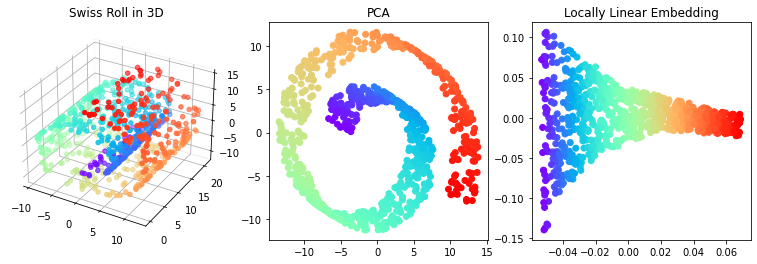

In [8]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=plt.figaspect(0.3))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')

ax2 = fig.add_subplot(1, 3, 2)
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('PCA');

ax3 = fig.add_subplot(1, 3, 3)
X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('Locally Linear Embedding');

## Aprendizaje reforzado (Reinforcement learning)

- Desarrollar un agente que mejore su rendimiento en función de las interacciones con el entorno.
    - Ejemplo: juegos como el Ajedrez, Go, ...
- Buscar un espacio (grande) de acciones y estados
- _Función de recompensa_ define qué tan bien funciona una (serie de) acciones
- Aprender una serie de acciones (políticas) que maximiza la recompensa a través de la exploración

![](https://drive.google.com/uc?id=1DTe4Z19on0Gx1cJrViXMmtMFr2Pawy-b)


# Aprendizaje = Representación + Evaluación + Optimización
Todos los algoritmos de aprendizaje automático constan de 3 componentes:
- **Representación**: un modelo debe estar representado en un lenguaje formal que la computadora pueda manejar
    - Define los 'conceptos' que puede aprender, el _espacio de hipótesis_
    - Por ej. un árbol de decisión, red neuronal, conjunto de puntos de datos anotados
- **Evaluación**: Una forma _interna_ de elegir una hipótesis sobre la otra
    - Función objetivo, función de puntuación, función de pérdida
    - Por ej. Diferencia entre salida correcta y predicciones
- **Optimización**: Una forma _eficiente_ de buscar el espacio de hipótesis
    - Comience con una hipótesis simple, extienda (relaje) si no se ajusta a los datos
    - Define la velocidad de aprendizaje, el número de óptimos, ...
    - Por ej. el gradiente descendiente
    
Un modelo potente/flexible solo es útil si también se puede optimizar de manera eficiente

### Ejemplo: redes neuronales
* Representación: red neuronal (en capas)
    * Cada conexión tiene un _weight_ (a.k.a. parámetros del modelo)
    * Cada nodo recibe los valores de entrada ponderados por los pesos y emite un nuevo valor
* El _espacio de hipótesis_ consiste en el conjunto de todos los pesos
* La arquitectura, el tipo de neuronas, etc. son fijos
    * Llamamos a estos _hiperparámetros_ (establecidos por el usuario, corregidos durante el entrenamiento)
    * También se pueden aprender (en un bucle externo)


![](https://drive.google.com/uc?id=1UXgb6Bp8I21j16T8UdxiYpwqSX0zY3Qe)
    


### Ejemplo: redes neuronales
* Representación: para ilustración, considere el espacio de 2 parámetros del modelo
* Evaluación: una _función de pérdida_ calcula, para cada conjunto de parámetros, qué tan buenas son las predicciones
    * _Estimado_ en un conjunto de datos de entrenamiento con las predicciones 'correctas'
    * No podemos ver la superficie completa, solo evaluar conjuntos específicos de parámetros
* Optimización: Encontrar el conjunto óptimo de parámetros
    * Por lo general, un tipo de _búsqueda_ en el espacio de hipótesis
    * Teniendo en cuenta unas cuantas evaluaciones iniciales, predecir qué parámetros pueden ser mejores

![](https://drive.google.com/uc?id=1LkKIO_bkbOFcaJhx0j2BmIQ-sCWUw0__)

# Generalización, Overfitting (sobre ajuste) y Underfitting (sub ajuste)
* _Esperamos_ que el modelo pueda _generalizar_ a partir de los datos de entrenamiento: haga predicciones precisas sobre datos no vistos.
* Nunca podemos estar seguros, solo esperamos que hagamos las suposiciones correctas.
    * Por lo general, suponemos que los datos nuevos serán similares a los datos anteriores.
    * _Sesgo inductivo_ (*Inductive bias*): supuestos que ponemos en el algoritmo (todo excepto los datos de entrenamiento en sí)

#### Ejemplo: salir a una cita (Dating) 
![](https://drive.google.com/uc?id=1DKSXJqRGnxqg_tXLl-ODny9ievvOGXFq)

- ¿Puedes encontrar una regla simple que funcione? ¿Es una mejor que otras?
- ¿Qué podemos asumir sobre el futuro? ¿Nada?
- ¿Qué pasa si hay ruido / errores?
- ¿Qué pasa si hay factores que no conoces?

## Overfitting and Underfitting
* Es fácil construir un modelo complejo que sea 100% preciso en los datos de entrenamiento, pero muy malo en los nuevos datos.
* Overfitting: construyendo un modelo que es _demasiado complejo para la cantidad de datos que tenemos_
    * Modelas peculiaridades en tus datos de entrenamiento (ruido, sesgos, ...)
    * Se resuelve simplificando el modelo (regularización) u obteniendo más datos
    * **La mayoría de los algoritmos tienen hiperparámetros que permiten la regularización**
* Underfitting: la construcción de un modelo que es _demasiado simple, dada la complejidad de los datos_
    * Utilizar un modelo más complejo
* Existen técnicas para detectar el overfitting (por ejemplo, análisis de sesgo-varianza). Lo veremos más adelante.
* Se puede construir _ensambles_ de muchos modelos para superar tanto el underfitting como el overfitting

* A menudo hay un punto óptimo que se debe encontrar optimizando la elección de algoritmos e hiperparámetros, o utilizando más datos.
* Ejemplo: regresión usando funciones polinómicas

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
X_test = np.linspace(0, 1, 100)
scores_x, scores_y = [], []

@interact
def plot_poly(degrees = (1, 16, 1)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))    
    polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    ax1.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax1.plot(X_test, true_fun(X_test), label="True function")
    ax1.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_xlim((0, 1))
    ax1.set_ylim((-2, 2))
    ax1.legend(loc="best")
    ax1.set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees, -scores.mean(), scores.std()))
    scores_x.append(degrees)
    scores_y.append(-scores.mean())

    # Plot scores
    ax2.scatter(scores_x, scores_y, edgecolor='b', s=20)
    order = np.argsort(scores_x)
    ax2.plot(np.array(scores_x)[order], np.array(scores_y)[order])
    ax2.set_xlim((0, 16))
    ax2.set_ylim((10**-2, 10**11))
    ax2.set_xlabel("degree")
    ax2.set_ylabel("error")
    ax2.set_yscale("log")
    
    fig.show()

interactive(children=(IntSlider(value=8, description='degrees', max=16, min=1), Output()), _dom_classes=('widg…

## Selección de Modelo
- Junto a la función de pérdida (interna), necesitamos una función de evaluación (externa)
    - Señal de retroalimentación: ¿estamos realmente aprendiendo lo correcto?
    - Estamos under/overfitting?
    - Más libremente elegido para adaptarse a la aplicación. Las funciones de pérdida tienen restricciones (por ejemplo, diferenciables)
    - Necesario para elegir entre algoritmos (o diferentes configuraciones de hiperparámetros)

- Los datos deben dividirse en conjuntos de _entrenamiento_ y _prueba_.
    - Optimizar los parámetros del modelo en el conjunto de entrenamiento, evaluar el conjunto de prueba independiente
    - Para optimizar también los hiperparámetros, se reserva parte del conjunto de entrenamiento como un conjunto de _validación_

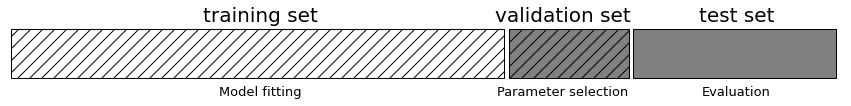

In [10]:
import mglearn
mglearn.plots.plot_threefold_split()

##Visión general

![](https://drive.google.com/uc?id=1-ew-fBIKSsEfeo4j5mVRwre0SQt1O2LW)

## Solo la generalización importa!
* Nunca evaluar sus modelos finales en los datos de entrenamiento, a excepción de:
    * Seguimiento de si el optimizador converge (curvas de aprendizaje)
    * Para detectar under/overfitting:
        * Puntaje de entrenamiento bajo, puntaje de prueba bajo: underfitting
        * Puntaje de entrenamiento alto, puntaje de prueba bajo: overfitting
* Mantenga siempre un conjunto de prueba completamente independiente
* Evitar la fuga de datos:
    * Nunca optimice la configuración de hiperparámetros en los datos de prueba
    * Nunca elija técnicas de preprocesamiento basadas en los datos de prueba.
* En conjuntos de datos pequeños, se debe usar múltiples divisiones de entrenamiento-prueba para evitar sesgos
    * Ej. Utilizar cross-validation (lo veremos después)

# Representación de la data (problema)    
- Algoritmos necesita transformar correctamente las entradas a las salidas correctas
- Mucho depende de cómo presentamos los datos al algoritmo
    - Transforme los datos en una representación más útil (a.k.a. _encoding_ o _embedding_)
    - Se puede hacer de principio a fin (por ejemplo, deep learning) o primero 'preprocesando' los datos
![](https://drive.google.com/uc?id=1oYCjzjuvdqAoO1kRHkZ8XSpCr-ktdtLG)

## Ingeniería de características
* La mayoría de las técnicas de aprendizaje automático requieren que los humanos construyan una buena representación de los datos.  
    * A veces, los datos están estructurados naturalmente (por ejemplo, exámenes médicos)
* Nada supera el conocimiento del dominio (cuando está disponible) para obtener una buena representación
    * Por ej. Datos de iris: el largo / ancho de la hoja separa bien las clases
* La ingeniería de características a menudo es necesaria para obtener los mejores resultados
    * Selección de características, reducción de dimensionalidad, escalado, ...
    
![](https://drive.google.com/uc?id=1oah3VCaWnslYQYUemsAvxqep6ws_V-OB)

## Aprendizaje de transformaciones de datos de principio a fin
* Para datos no estructurados (por ejemplo, imágenes, texto), es difícil extraer buenas características
* Deep learning: aprende su propia representación (embedding) de los datos
    * A través de múltiples capas de representación (por ejemplo, capas de neuronas)
    * Cada capa transforma los datos un poco, en función de lo que reduce el error

![](https://drive.google.com/uc?id=1Fd4zKto7uocwo13WZv83uzMmjA9xzuQD)

#### Ejemplo: clasificación de dígitos
- Los píxeles de entrada entran, cada capa los transforma en una representación cada vez más informativa para la tarea dada
- A menudo menos intuitivo para los humanos.

![](https://drive.google.com/uc?id=1OFlDCqMfrz31wXoJ_F4_oSsxrJGIDmLG)

## Maldición de la dimensionalidad (Curse of dimensionality)
* La intuición falla en altas dimensiones: 
    - Muestrear aleatoriamente puntos en un espacio n-dimensional (por ejemplo, un hipercubo unitario)
    - Cuantas más dimensiones tenga, más _sparse_ (escaso/vacío) se volverá el espacio
    - Las distancias entre dos puntos serán casi idénticas
    - Casi todos los puntos se vuelven atípicos en el borde del espacio

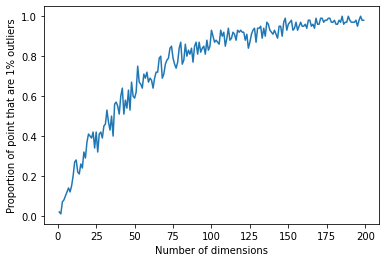

In [11]:
# Code originally by Peter Norvig 
def sample(d=2, N=100):
    return [[np.random.uniform(0., 1.) for i in range(d)] for _ in range(N)]

def corner_count(points):
    return np.mean([any([(d < .01 or d > .99) for d in p]) for p in points])

def go(Ds=range(1,200)):
    plt.plot(Ds, [corner_count(sample(d)) for d in Ds])
    plt.xlabel("Number of dimensions")
    plt.ylabel("Proportion of point that are 1% outliers")
    
go()

_Balance entre aumentar una cierta cantidad de dimensiones y que sólo haya 1 dato por cada clase_
_Si tenemos muchas dimensiones, se debe evitar el problema del sobreajuste por la cantidad de ejemplos disponibles por cada variable._

#### Consecuencias prácticas
* Para cada dimensión (característica) que agregue, necesita exponencialmente más datos para evitar la escasez (sparseness)
* Afecta a cualquier algoritmo que se base en distancias (por ejemplo, kNN, SVM, métodos basados en kernels, métodos basados en árboles, ...)
* Bendición de la no uniformidad: en muchas aplicaciones, los datos viven en un subespacio muy pequeño
* Puede mejorar drásticamente el rendimiento seleccionando características o utilizando representaciones de datos de dimensiones más bajas

## Más datos pueden vencer a un algoritmo más inteligente (pero necesita ambos)
* Más datos reduce la posibilidad de overfitting
* Menos datos sparse (escasos) reduce la maldición de la dimensionalidad
* Modelos *no paramétricos*: la cantidad de parámetros del modelo aumenta con la cantidad de datos
    - Técnicas basadas en árboles, k-vecinos más cercanos, SVM, ...
    - Pueden aprender cualquier modelo con datos suficientes (pero pueden quedarse atrapados en los mínimos locales)
* Modelos _paramétricos_ (tamaño fijo): número fijo de parámetros del modelo
    - Modelos lineales, redes neuronales, ...
    - Se le puede dar una gran cantidad de parámetros para beneficiarse de más datos 
    - Los modelos de deep learning pueden tener millones de pesos, aprendiendo casi cualquier función.
* El cuello de botella está moviendo de datos para calcular / escalabilidad

# Construyendo sistemas de ML
Un sistema de machine learning típico tiene múltiples componentes:
    
- Preprocesamiento: los datos sin procesar rara vez son ideales para el aprendizaje
    - Escalado de características: llevar los valores a un mismo rango
    - Codificación: hacer que las características categóricas sean numéricas
    - Discretización: hacer que las características numéricas sean categóricas
    - Corrección de desequilibrio de etiquetas (por ejemplo, hacer un downsampling de la clase mayoritaria) 
    - Selección de características: remover características poco interesantes / correlacionadas. 
    - La reducción de la dimensionalidad también puede facilitar el aprendizaje de los datos.
    - Usando embeddings previamente entrenados (ej. palabra a vector, imágen a vector)
    

- Aprendizaje y evaluación
    - Cada algoritmo tiene sus propios sesgos
    - Ningún algoritmo único (específico) es siempre el mejor
    - _Selección de modelo_ compara y selecciona los mejores modelos
        - Diferentes algoritmos, diferentes configuraciones de hiperparámetros
    - Dividir datos en conjuntos de entrenamiento, validación y prueba
    
- Predicción
    - El modelo optimizado final se puede usar para la predicción
    - El desempeño esperado es el desempeño medido en un conjunto de prueba independiente

- Juntos forman un _workflow_ de _pipeline_
- Necesita optimizar las pipelines continuamente
    - _Concept drift_: el fenómeno que estás modelando puede cambiar con el tiempo
    - _Feedback_: las predicciones de su modelo pueden cambiar datos futuros

![](https://drive.google.com/uc?id=1o4laO5iq2FHQeX9JMi09nScZZqVcQbKC)

# En la práctica
* Construyamos un modelo simple para nuestro conjunto de datos Iris
* Usaremos **scikit-learn**
    * Contiene muchos algoritmos de aprendizaje automático de última generación.
    * Disponible [documentación fácil de seguir](http://scikit-learn.org/stable/documentation) sobre cada algoritmo
    * Actualmente muy popular, existen varios [tutoriales](http://scikit-learn.org/stable/user_guide.html) y fragmentos de código están disponibles 
    * Funciona bien con numpy, scipy, pandas, matplotlib,...

### Importación de datos
Múltiples opciones:

* Se incluyen algunos conjuntos de datos de juguetes en `sklearn.datasets`
* Importación de [1000s de machine learning datasets desde OpenML](http://www.openml.org) con `sklearn.datasets.fetch_openml`
* Puede importar archivos de datos (CSV) con `pandas` o `numpy`

Iris está incluido en scikitlearn, así que podemos cargarla directamente. 

Esto devolverá un objeto `Bunch` (similar a `dict`)

``` python
iris_dataset = load_iris()
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")
```

In [12]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")

Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


Los objetivos (clases) y las características se almacenan como `list`s, los datos como` ndarray`

``` python
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5]))
```

In [13]:
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5]))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Los objetivos se almacenan por separado como un `ndarray`, con índices que apuntan a las características

``` python
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))
```

In [14]:
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))

Target names: ['setosa' 'versicolor' 'virginica']
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Construyendo (fitting) modelos
Todos los estimadores scikit-learn siguen el mismo interfaz (esquema)

```python
class SupervisedEstimator(...):
    def __init__(self, hyperparam, ...):

    def fit(self, X, y):   # Fit/model the training data
        ...                # given data X and targets y
        return self
     
    def predict(self, X):  # Make predictions
        ...                # on unseen data X  
        return y_pred
    
    def score(self, X, y): # Predict and compare to true
        ...                # labels y                
        return score
```

### datos de entrenamiento y prueba
Para evaluar nuestro clasificador, necesitamos probarlo en datos no vistos.  
`train_test_split`: divide datos aleatoriamente en un 75% de entrenamiento y un 25% de datos de prueba.

``` python
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
```

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], 
    random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Nota: hay varios problemas con este enfoque que discutiremos más adelante:

* ¿Por qué 75%? ¿Hay mejores formas de dividirse?
* ¿Qué pasa si una división aleatoria produce modelos diferentes que otro?
* ¿Qué pasa si todos los ejemplos de una clase terminan en el conjunto de entrenamiento / prueba?

### Mirando los datos (con pandas)

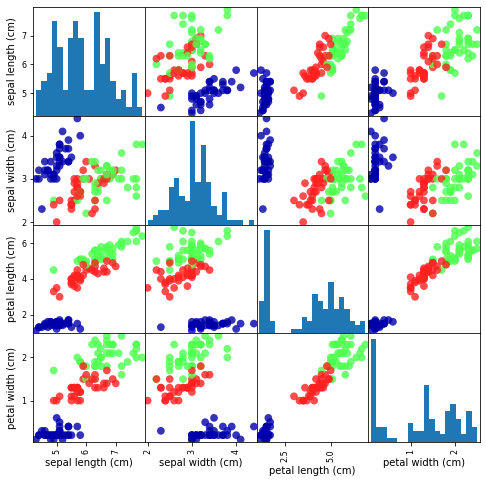

In [16]:
import pandas as pd
from pandas.plotting import scatter_matrix

# Build a DataFrame with training examples and feature names
iris_df = pd.DataFrame(X_train, 
                       columns=iris_dataset.feature_names)

# scatter matrix from the dataframe, color by class
sm = scatter_matrix(iris_df, c=y_train, figsize=(8, 8), 
                  marker='o', hist_kwds={'bins': 20}, s=60, 
                  alpha=.8, cmap=mglearn.cm3)

### Entrenando (Fitting) un modelo

El primer modelo que construiremos se llama k-Nearest Neighbour, o kNN. Más sobre este modelo pronto.  
kNN está incluido en `sklearn.neighbors`, ssí que construyamos nuestro primer modelo

``` python
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
```

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Haciendo predicciones
Creemos un nuevo ejemplo y solicitemos al modelo kNN que lo clasifique

``` python
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
```

In [18]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluando el modelo
Alimentar todos los ejemplos de prueba al modelo produce todas las predicciones

``` python
y_pred = knn.predict(X_test)
```

In [19]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


Ahora podemos contar qué porcentaje fue correcto o usar `score`

``` python
print("Score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))
```

In [20]:
print("Score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))

Score: 0.97
Score: 0.97


# k-Nearest Neighbor

* La construcción del modelo consiste solo en almacenar el conjunto de datos de entrenamiento
* Para hacer una predicción, el algoritmo encuentra los _k_ puntos de datos más cercanos en el conjunto de datos de entrenamiento
    * Clasificación: predecir la clase más frecuente de los k vecinos
    * Regresión: predecir el promedio de los valores de los k vecinos
    * Ambos pueden ser ponderados por la distancia a cada vecino
* Hiperparámetros principales:
    * Número de vecinos (k). Actúa como un regularizador.
    * Elección de la función de distancia (por ej., Euclidiana)
    * Esquema de ponderación (uniforme, distancia, ...) #cada individuo pesa lo mismo (uniforme)
* Model:
    - Representación: Almacenar ejemplos de entrenamiento (por ejemplo, en KD-tree)
    - Funciones de pérdida típicas:
        * Clasificación: Accuracy (Zero-One Loss)
        * Regresión: Root mean squared error
    - Optimización: No tiene (no hay parámetros del modelo para ajustar)

## Clasificación k-Nearest Neighbor
para k = 1: devuelve la clase del vecino más cercano

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


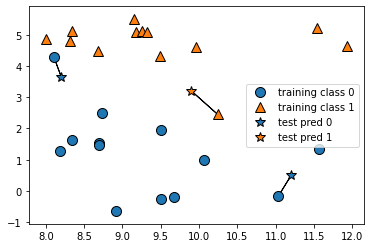

In [34]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

para k> 1: por votación y devuelve la mayoría (o un valor de confianza para cada clase)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


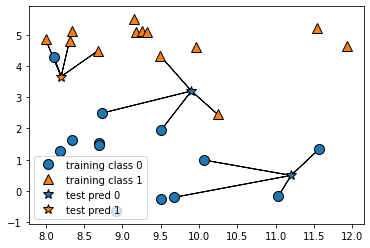

In [37]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

Construyamos un modelo kNN para este conjunto de datos (llamado 'Forge')

``` python
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
```

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


KNeighborsClassifier(n_neighbors=3)

In [40]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test)) #porcentaje de clasificaciones correcta global

Test set accuracy: 0.86


#### Análisis
Podemos dibujar la predicción para cada entrada posible para ver la *frontera de decisión*

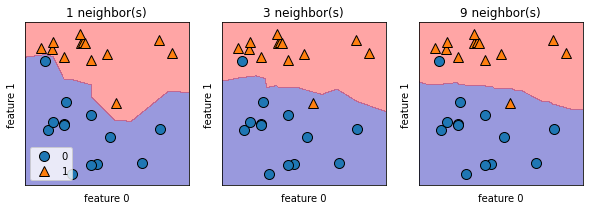

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
_ = axes[0].legend(loc=3)

Usar pocos vecinos corresponde a una alta complejidad del modelo (izquierda), y usar muchos vecinos corresponde a una baja complejidad del modelo y una frontera de decisión más suave (derecha).

Podemos medir más directamente el efecto en el entrenamiento y el error de prueba en un conjunto de datos más grande (breast_cancer)

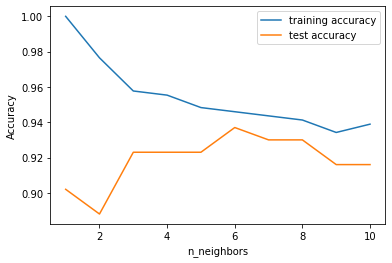

In [41]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Build a list of the training and test scores for increasing k
training_accuracy = []
test_accuracy = []
k = range(1, 11)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()
# esta es la forma en la que se puede explorar el valor más apropiado

Para un pequeño número de vecinos, el modelo es demasiado complejo y sobreajusta los datos de entrenamiento. A medida que se consideran más vecinos, el modelo se vuelve más simple y la precisión del entrenamiento disminuye, pero la precisión de la prueba aumenta, hasta cierto punto. Después de aproximadamente 8 vecinos, el modelo comienza a volverse demasiado simple (underfits) y la precisión de la prueba vuelve a caer.

## Regresión k-Neighbors
para k = 1: devuelve el valor objetivo del vecino más cercano

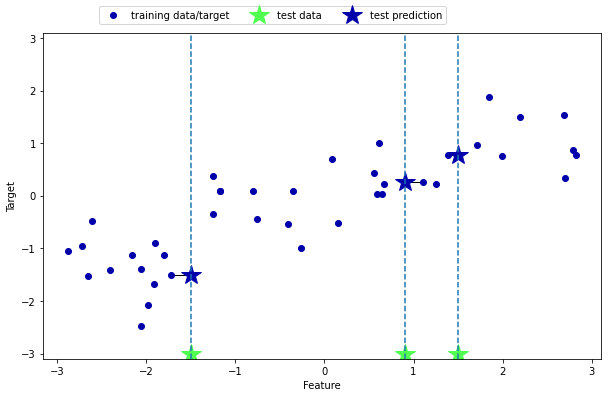

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

para k> 1: devuelve el _promedio_ de los valores objetivo de los _k_ vecinos más cercanos

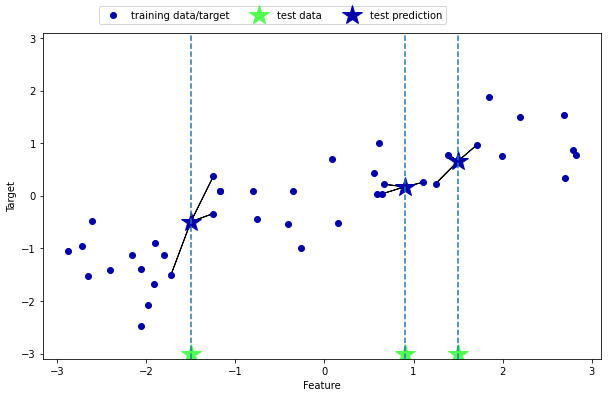

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

Para hacer la regresión, simplemente use `KNeighboursRegressor` 

``` python
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
```

In [29]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

La función de puntuación predeterminada para los modelos de regresión es $R^{2}$. Será discutido más adelante en el curso. El valor óptimo es 1. Los valores negativos significan que las predicciones son peores que solo predecir la media.

In [30]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [31]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Análisis
De nuevo podemos generar las predicciones para cada entrada posible, para diferentes valores de _k_.

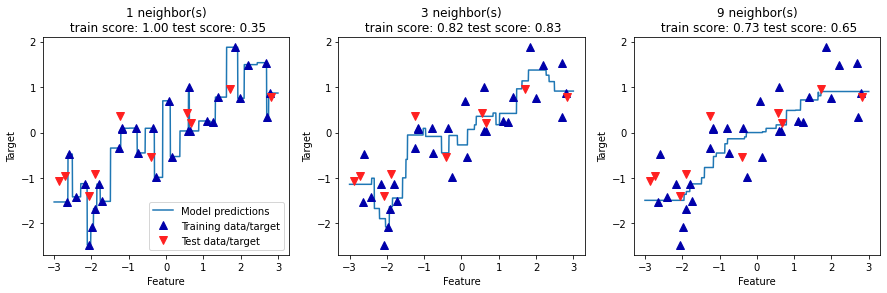

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
_ = axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Una vez más, vemos que un pequeño _k_ conduce a un modelo demasiado complejo (overfitting), mientras que un _k_ más grande produce un ajuste más suave.

## kNN: Fortalezas, debilidades y parámetros.
* Fácil de entender, funciona bien en muchos entornos.
* El entrenamiento es muy rápido, la predicción es lenta para grandes conjuntos de datos
* Malo en datos de alta dimensión y dispersos/sparse (maldición de dimensionalidad)

## Resumen

- Hemos cubierto los principales conceptos de aprendizaje automático
- Usamos scikit-learn para construir nuestro primer modelo
- Conocimos nuestro primer algoritmo (kNN)